## Part 1 steps 5 - 10

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\User\Instacart Basket Analysis'
df_orders_products_region = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_10_3_orders_products_region_add.pkl'))

### I want to select the variables I need for the task of customer profiling

In [3]:
df_orders_products_region.columns

Index(['user_id', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order',
       'days_since_prior_order_Flag', 'add_to_cart_order', 'reordered',
       'max_order', 'loyalty_flag', 'average_price', 'spender_flag',
       'median_freq', 'freq_Flag', 'region'],
      dtype='object')

### I will drop unnessesary now for profiling columns

In [4]:
# Drop unnessesary columns
df_orders_products_region = df_orders_products_region.drop(columns = ['product_id', 'aisle_id', 'add_to_cart_order', 
                                                                      'reordered', 'max_order', 'average_price'])

In [4]:
df_orders_products_region.shape

(32401975, 21)

In [6]:
df_orders_products_region.columns

Index(['user_id', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       'product_name', 'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'days_since_prior_order_Flag', 'loyalty_flag', 'spender_flag',
       'median_freq', 'freq_Flag', 'region'],
      dtype='object')

In [7]:
# Export file
df_orders_products_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4_10_3_orders_products_region.pkl'))

### Profiling statistics

#### First, I will create the corr_matrix for numeric only columns

In [9]:
corr_matrix = df_orders_products_region.corr(numeric_only=True)

In [10]:
corr_matrix

,user_id,Age,n_dependants,income,department_id,prices,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_Flag,median_freq
user_id,1.000000,-0.001398,-0.003192,0.002574,0.000053,-0.000172,-0.000487,-0.000770,-0.001631,-0.000404,0.000556,0.000214,0.000935
Age,-0.001398,1.000000,-0.000417,0.417259,-0.001429,0.000649,-0.000483,-0.000367,0.002139,0.001872,-0.001096,0.000168,-0.001177
n_dependants,-0.003192,-0.000417,1.000000,-0.001395,0.000189,-0.000011,-0.001557,-0.002540,-0.000482,0.000869,0.001433,-0.000215,0.001058
income,0.002574,0.417259,-0.001395,1.000000,-0.021390,0.051938,-0.000921,0.016957,0.001805,0.008537,-0.014080,-0.009044,-0.025864
department_id,0.000053,-0.001429,0.000189,-0.021390,1.000000,-0.083490,-0.000232,0.000562,0.004427,-0.008858,0.000560,-0.001365,0.000743
prices,-0.000172,0.000649,-0.000011,0.051938,-0.083490,1.000000,0.000240,-0.001336,-0.000714,0.002223,0.001022,-0.000406,-0.000520
order_id,-0.000487,-0.000483,-0.001557,-0.000921,-0.000232,0.000240,1.000000,-0.000545,0.001210,0.000654,0.000725,0.000044,0.000257
order_number,-0.000770,-0.000367,-0.002540,0.016957,0.000562,-0.001336,-0.000545,1.000000,0.015210,-0.040039,-0.358401,-0.240822,-0.452782
orders_day_of_the_week,-0.001631,0.002139,-0.000482,0.001805,0.004427,-0.000714,0.001210,0.015210,1.000000,0.012166,-0.030008,-0.003598,-0.021711
order_hour_of_day,-0.000404,0.001872,0.000869,0.008537,-0.008858,0.002223,0.000654,-0.040039,0.012166,1.000000,0.003880,0.012359,0.038743


#### Significant correlation coefficients have the next columns: 1. Age/income (0.417259), 2. order_number/days_since_prior_order (-0.358401), 3. order_number/median_freq (-0.452782), 4. days_since_prior_order/median_freq (0.632013). The correlation 1. is understandable. The correlation 4. is result of my previous calculation for the median_freq. The correlations 2. and 3. are  are difficult to explain.

### Age/income line chart 

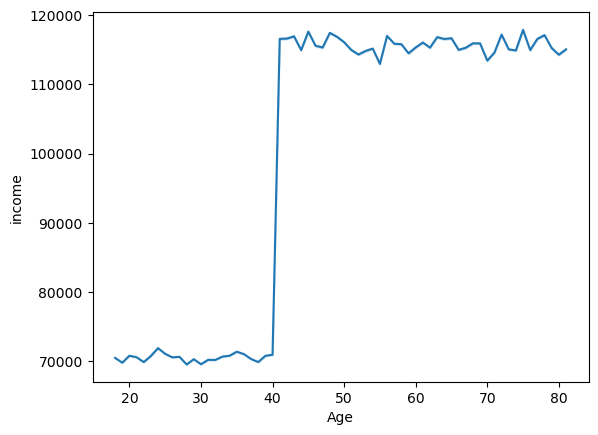

In [12]:
line_Age_income = sns.lineplot(data = df_orders_products_region, x = 'Age', y = 'income')

#### We see the real difference in income.

In [14]:
# Export the chart
line_Age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Age_income.png'))

### I will create a new variable 'order_cost' as product 'prices' * 'order_number'

In [25]:
df_orders_products_region = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_10_3_orders_products_region.pkl'))

In [26]:
df_orders_products_region['order_cost'] = df_orders_products_region.apply(lambda row: row['prices'] * row['order_number'], axis=1)

In [27]:
df_orders_products_region.head(3)

,user_id,STATE,Age,n_dependants,fam_status,income,product_name,department_id,prices,order_id,...,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,days_since_prior_order_Flag,loyalty_flag,spender_flag,median_freq,freq_Flag,region,order_cost
0,26711,Missouri,48,3,married,165665,Soda,7,9.0,2543867,...,1,9,30.0,False,New customer,Low spender,19.0,Regular customer,Midwest,45.0
1,26711,Missouri,48,3,married,165665,Soda,7,9.0,1285508,...,5,15,11.0,False,New customer,Low spender,19.0,Regular customer,Midwest,63.0
2,26711,Missouri,48,3,married,165665,Soda,7,9.0,2578584,...,1,15,10.0,False,New customer,Low spender,19.0,Regular customer,Midwest,72.0


In [28]:
# Export file
df_orders_products_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4_10_3_orders_products_region_add.pkl'))

### A new corr. marix with value 'order_cost'

In [18]:
corr_matrix1 = df_orders_products_region[['order_cost', 'Age', 'income', 'n_dependants', 'order_hour_of_day', 'orders_day_of_the_week' ]].corr(numeric_only=True)

In [19]:
corr_matrix1

,order_cost,Age,income,n_dependants,order_hour_of_day,orders_day_of_the_week
order_cost,1.000000,-0.000229,0.033364,-0.001986,-0.031114,0.011877
Age,-0.000229,1.000000,0.417259,-0.000417,0.001872,0.002139
income,0.033364,0.417259,1.000000,-0.001395,0.008537,0.001805
n_dependants,-0.001986,-0.000417,-0.001395,1.000000,0.000869,-0.000482
order_hour_of_day,-0.031114,0.001872,0.008537,0.000869,1.000000,0.012166
orders_day_of_the_week,0.011877,0.002139,0.001805,-0.000482,0.012166,1.000000


#### No significant correlation coefficients

### I will group by department_id and calculate the sum of order_cost

In [29]:
df_departments_results = df_orders_products_region.groupby('department_id').agg({'order_cost': ['sum']})

In [30]:
df_departments_results

,order_cost
,sum
department_id,
1,2.662230e+08
2,4.299367e+06
3,1.584311e+08
4,1.344555e+09
5,1.904453e+07
6,3.411292e+07
7,3.572049e+08
8,1.178540e+07


In [31]:
df_departments_results.to_csv(os.path.join(path, '02 Data','Prepared Data', 'my_dpt.csv'))    

#### After some Excel work plot the bar

In [11]:
df_departments_results_ed = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'my_dpt.csv'))

In [35]:
df_dpt_name = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Dpt.csv'))

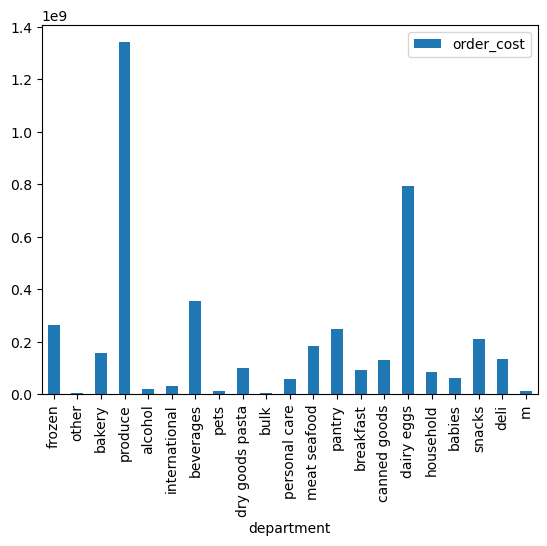

In [36]:
Bar_depart1 = df_dpt_name.plot.bar(x='department', y='order_cost')

In [37]:
# Sorting
df_dpt_name = df_dpt_name.sort_values(by=['order_cost'], ascending=False)

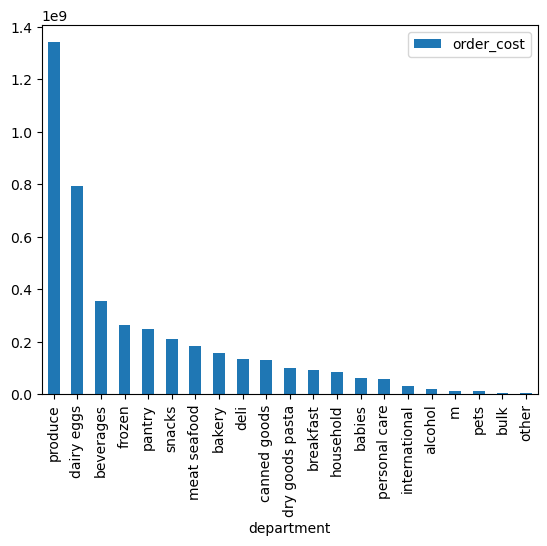

In [38]:
Bar_depart2 = df_dpt_name.plot.bar(x='department', y='order_cost')

In [39]:
Bar_depart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depart2_bar.png'))

In [40]:
Bar_depart1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depart1_bar.png'))